In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, itertools, re

In [107]:
if 'google.colab' in sys.modules:    
    project_path =  "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

In [108]:
df_train= pd.read_csv('bankmarketing.csv')
df=df_train.copy()

In [109]:
display(df_train.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [110]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [111]:
df_train.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [112]:
df_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [113]:
df_train['subscribed'].value_counts()

no     36548
yes     4640
Name: subscribed, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


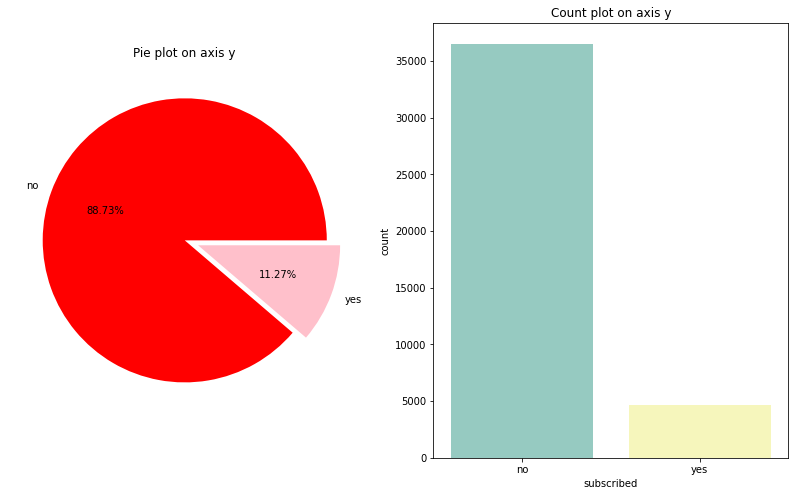

In [114]:
f, ax = plt.subplots(1, 2, figsize = (14, 8))

df_train['subscribed'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%.2f%%', ax = ax[0],colors=['red','pink'])
ax[0].set_title('Pie plot on axis y')
ax[0].set_ylabel('')
sns.countplot('subscribed', data = df_train, ax = ax[1],palette="Set3")
ax[1].set_title('Count plot on axis y')

plt.show()

In [115]:

def check_unique(): 
    colname = list(df_train.columns)
    for i in colname:
        print('<<{}>>\n'.format(i), df_train[i].unique())#[:10])
       # if i == 'education':
       #     break

In [116]:
check_unique()

<<age>>
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
<<job>>
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
<<marital>>
 ['married' 'single' 'divorced' 'unknown']
<<education>>
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
<<default>>
 ['no' 'unknown' 'yes']
<<housing>>
 ['no' 'yes' 'unknown']
<<loan>>
 ['no' 'yes' 'unknown']
<<contact>>
 ['telephone' 'cellular']
<<month>>
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
<<day_of_week>>
 ['mon' 'tue' 'wed' 'thu' 'fri']
<<duration>>
 [ 261  149  226 ... 1246 1556 1868]
<<campaign>>
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35

In [117]:
df_train['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [118]:
df_train['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

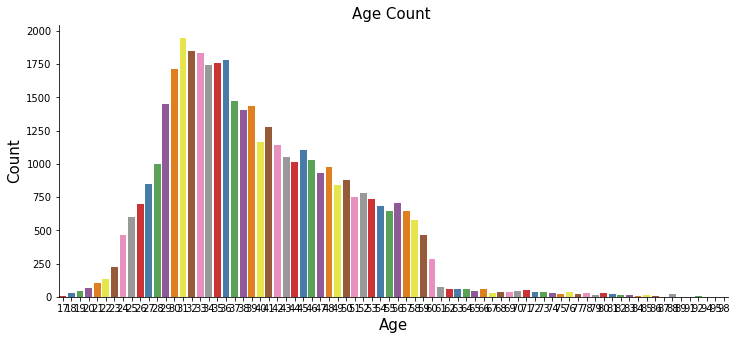

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.countplot(x = 'age', data = df_train, palette="Set1")
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count ', fontsize=15)
sns.despine()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


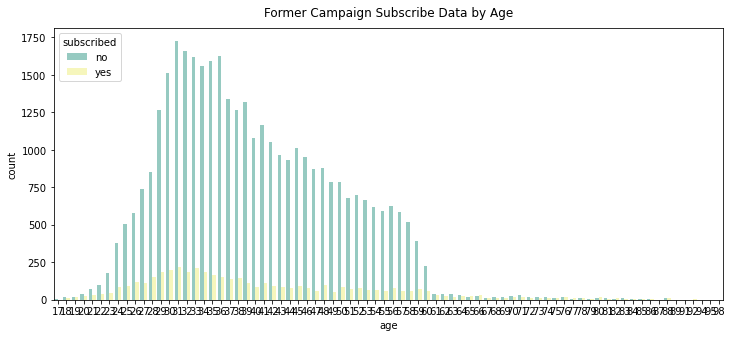

In [120]:
y_position = 1.02
plt.figure(figsize = (12, 5))
sns.countplot('age', hue = 'subscribed', data = df_train, palette="Set3")
plt.title('Former Campaign Subscribe Data by Age', y = y_position)
plt.show()

In [121]:
df_train['age_group'] = df_train['age'].apply(lambda x : 0 if x < 10 else 
                                              (10 if x < 20 else
                                              (20 if x < 30 else
                                              (30 if x < 40 else
                                              (40 if x < 50 else
                                              (50 if x < 60 else
                                              (60 if x < 70 else
                                              (70 if x < 80 else
                                              (80 if x < 90 else
                                              (90 if x < 100 else 100))))))))))

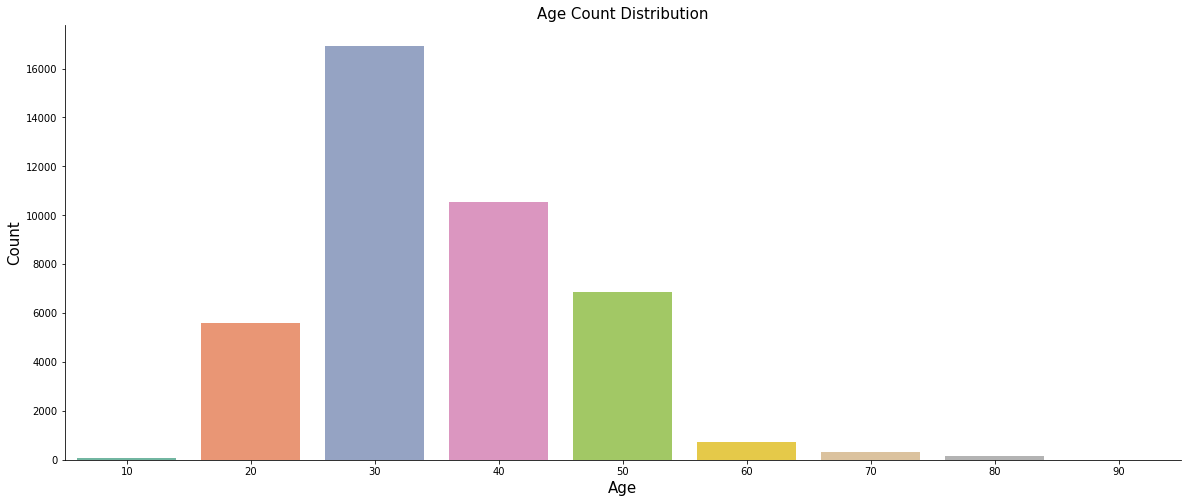

In [122]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age_group', data = df_train, palette="Set2")
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


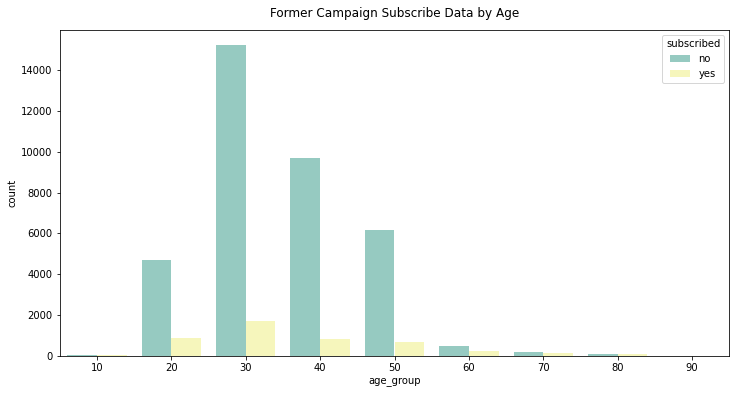

In [123]:
plt.figure(figsize = (12, 6))
sns.countplot('age_group', hue = 'subscribed', data = df_train, palette="Set3")
plt.title('Former Campaign Subscribe Data by Age', y = y_position)
plt.show()

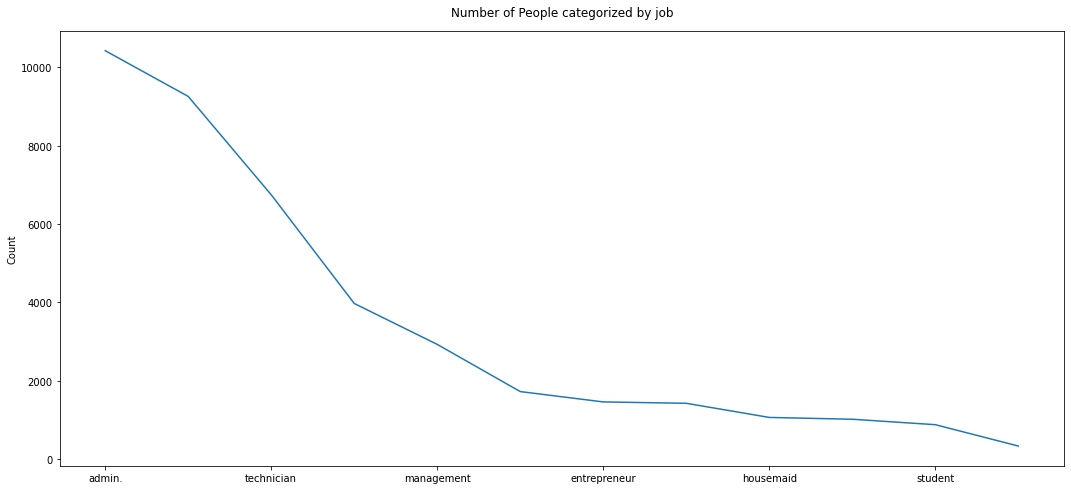

In [124]:
from matplotlib import gridspec

y_position = 1.02
plt.figure(figsize = (18, 8))
df_train['job'].value_counts().plot.line()
plt.title('Number of People categorized by job', y = y_position)
plt.ylabel('Count')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


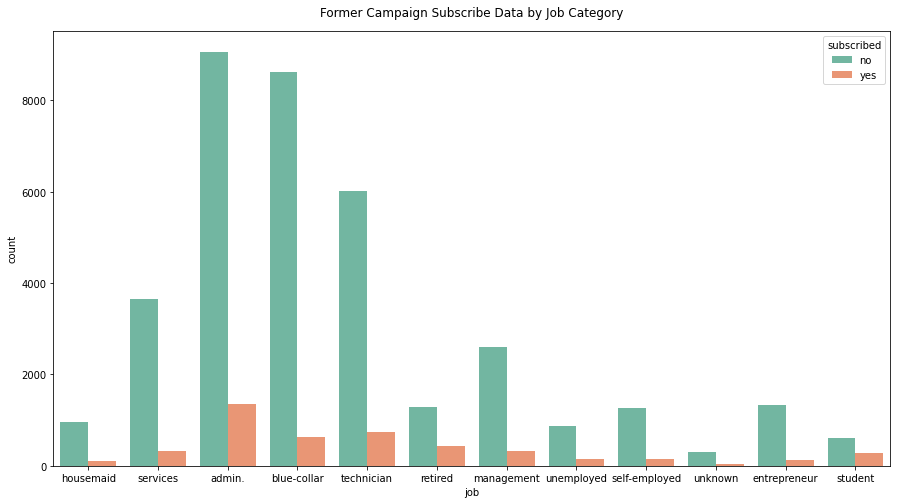

In [125]:
plt.figure(figsize = (15, 8))
sns.countplot('job', hue = 'subscribed', data = df_train, palette="Set2")
plt.title('Former Campaign Subscribe Data by Job Category', y = y_position)
plt.show()

In [126]:

df_train['job'].isin(['unknown']).sum()

330

In [127]:
df_train.groupby('job').max()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,age_group
job,,,,,,,,,,,,,,,,,,,,,
admin.,72,unknown,unknown,unknown,yes,yes,telephone,sep,wed,3785,56,999,7,success,1.4,94.767,-26.9,5.045,5228.1,yes,70
blue-collar,80,unknown,unknown,unknown,yes,yes,telephone,sep,wed,4199,41,999,4,success,1.4,94.767,-26.9,5.045,5228.1,yes,80
entrepreneur,69,unknown,unknown,unknown,yes,yes,telephone,sep,wed,2462,39,999,4,success,1.4,94.767,-26.9,5.045,5228.1,yes,60
housemaid,85,unknown,unknown,unknown,yes,yes,telephone,sep,wed,2926,27,999,5,success,1.4,94.767,-26.9,4.970,5228.1,yes,80
management,80,unknown,unknown,unknown,yes,yes,telephone,sep,wed,3422,35,999,6,success,1.4,94.767,-26.9,5.000,5228.1,yes,80
retired,98,unknown,unknown,unknown,yes,yes,telephone,sep,wed,3183,42,999,6,success,1.4,94.767,-26.9,4.970,5228.1,yes,90
self-employed,71,unknown,unknown,unknown,yes,yes,telephone,sep,wed,3366,40,999,4,success,1.4,94.767,-26.9,5.045,5228.1,yes,70
services,69,unknown,unknown,unknown,yes,yes,telephone,sep,wed,2260,35,999,4,success,1.4,94.767,-26.9,4.970,5228.1,yes,60
student,47,unknown,unknown,unknown,yes,yes,telephone,sep,wed,2680,17,999,5,success,1.4,94.767,-26.9,4.970,5228.1,yes,40


### 2.4 [education]<a id="2.4"></a> 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


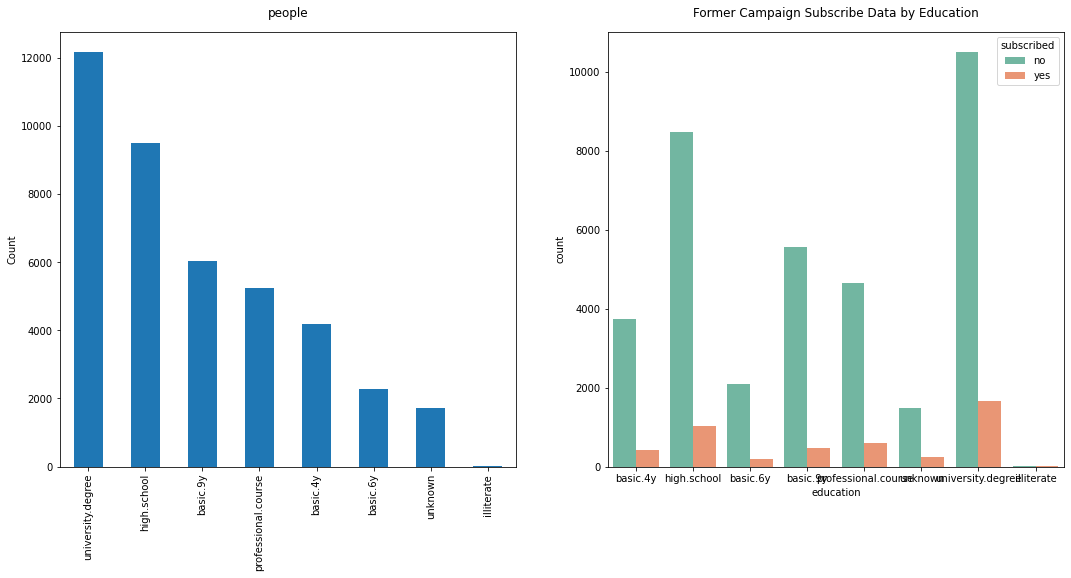

In [128]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['education'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('people', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('education', hue = 'subscribed', data = df_train, ax = ax[1],palette="Set2")
ax[1].set_title('Former Campaign Subscribe Data by Education', y = y_position)
plt.show()

In [129]:
df_train.groupby('contact').count().subscribed

contact
cellular     26144
telephone    15044
Name: subscribed, dtype: int64

In [130]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

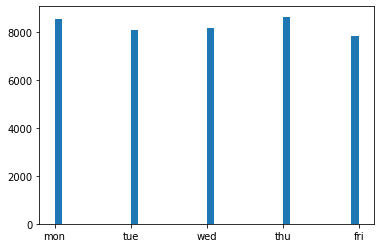

In [131]:
plt.hist(df_train.day_of_week, 40)
plt.show()

In [132]:
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,70
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,40
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,50
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,40


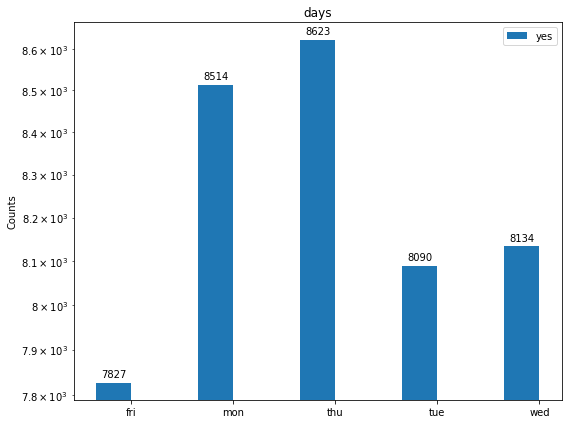

In [133]:
labels_day=df_train.day_of_week.unique()
labels_day.sort()
df_day_total = df_train.groupby('day_of_week').count().subscribed

x = np.arange(len(labels_day))
width = 0.35  

fig, ax = plt.subplots(figsize = (8, 6))
rects1 = ax.bar(x - width/2, df_day_total, width, label='yes',log=True)

ax.set_ylabel('Counts')
ax.set_title('days')
ax.set_xticks(x)
ax.set_xticklabels(labels_day)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)


fig.tight_layout()

plt.show()


In [134]:
df_train.loc[df_train.month=='jan','month']=1
df_train.loc[df_train.month=='feb','month']=2
df_train.loc[df_train.month=='mar','month']=3
df_train.loc[df_train.month=='apr','month']=4
df_train.loc[df_train.month=='may','month']=5
df_train.loc[df_train.month=='jun','month']=6
df_train.loc[df_train.month=='jul','month']=7
df_train.loc[df_train.month=='aug','month']=8
df_train.loc[df_train.month=='sep','month']=9
df_train.loc[df_train.month=='oct','month']=10
df_train.loc[df_train.month=='nov','month']=11
df_train.loc[df_train.month=='dec','month']=12
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
2,37,services,married,high.school,no,yes,no,telephone,5,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40
4,56,services,married,high.school,no,no,yes,telephone,5,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,70
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,40
41185,56,retired,married,university.degree,no,yes,no,cellular,11,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,50
41186,44,technician,married,professional.course,no,no,no,cellular,11,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,40


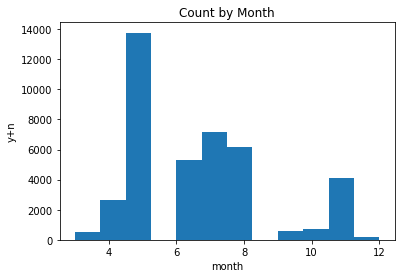

In [135]:
plt.hist(df_train.month,12)
plt.xlabel('month')
plt.ylabel('y+n')
plt.title('Count by Month')
plt.show()

In [136]:

import matplotlib.gridspec as gridspec

def Check_Null_Values(dataframe):
    print(dataframe.info())
    sns.heatmap(dataframe.isnull(),yticklabels=False, cmap='viridis').set_title('Null Values in each columns')
    
    
def Check_Balance_Specific_Col(dataframe, Col_Names):
    plt.figure(figsize=(9,3))
    for col in Col_Names:
        ValCount = dataframe[col].value_counts()
        PerCount = (ValCount / ValCount.sum())*100 
        plt.bar(ValCount.index,PerCount)
        plt.xticks(PerCount.index,PerCount.index.values)
        plt.ylabel("Frequency")
        plt.title('Distribution of Data')
        plt.show()
        print("Feature Name: {}: \n {}".format(col,ValCount))
        print("Feature Name: {}: \n Percent Count \n{}".format(col,PerCount))
        
def Check_Balance2(dataframe):
    Col_Names = dataframe.columns.tolist()
    nrows = int(len(Col_Names)/2) +1
    fig = plt.figure()
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15,40))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle('Distributions of dataset Features')
    for ax, col in zip(axes.flatten(), Col_Names):
        ValCount = dataframe[col].value_counts()
        ax.bar(ValCount.index,ValCount)
        ax.set_xticks(ValCount.index.values)

In [137]:
Col = df_train.columns.tolist()
int(len(Col)/2) +1

12

In [138]:
df_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed         object
age_group           int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

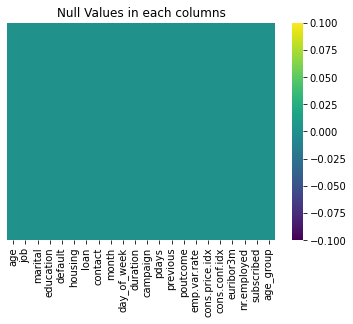

In [139]:
Check_Null_Values(df_train)

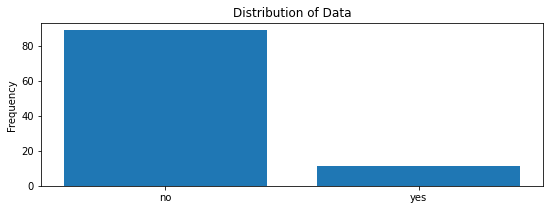

Feature Name: subscribed: 
 no     36548
yes     4640
Name: subscribed, dtype: int64
Feature Name: subscribed: 
 Percent Count 
no     88.734583
yes    11.265417
Name: subscribed, dtype: float64


In [140]:
Col = ["subscribed"]
Check_Balance_Specific_Col(df_train, Col)

In [145]:

def Display_Correlation(EncodedData):
    plt.figure(figsize=(15,8))
    corr = EncodedData.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns,cmap= "BuPu",annot=True,vmin=-1, vmax=1,linewidths=1)
    plt.show()

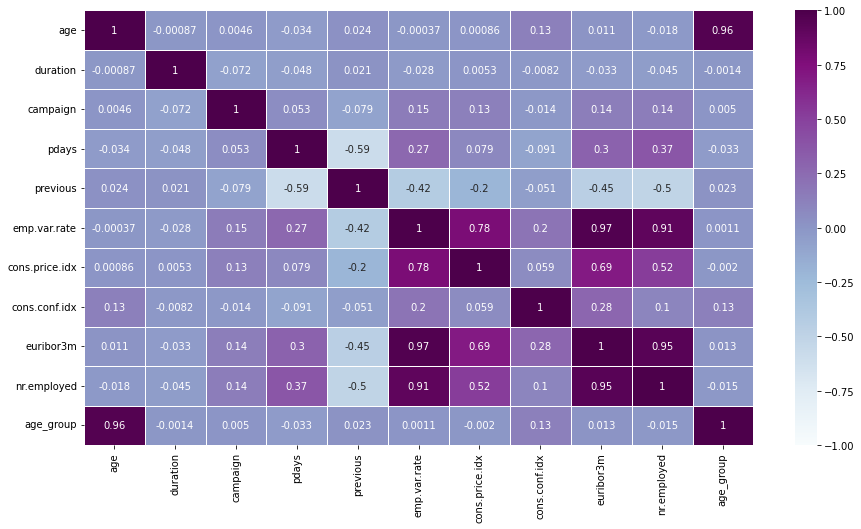

In [159]:
Display_Correlation(df_train)

In [160]:
DataFrame2 = df_train.copy()

In [161]:

def Count_CatVar(dataframe):
    CatCol = dataframe.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(CatCol):
        print("------------",col," value counts---------------------")
        print(dataframe[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in CatCol:
        a = dataframe[i].unique()
        print("There are {} categories in {}".format(len(a),i))

In [162]:
Count_CatVar(DataFrame2)

------------ job  value counts---------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
------------ marital  value counts---------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
------------ education  value counts---------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
------------ default  value counts---------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
------------ housing  value counts---

In [163]:
DataFrame3 = DataFrame2.drop(['subscribed'], axis = 1)
DataFrame3 = pd.get_dummies(DataFrame3, drop_first=True)

In [164]:
X = DataFrame3
Y = DataFrame2['subscribed']

In [165]:
bank_client = df_train.iloc[:,0:7]

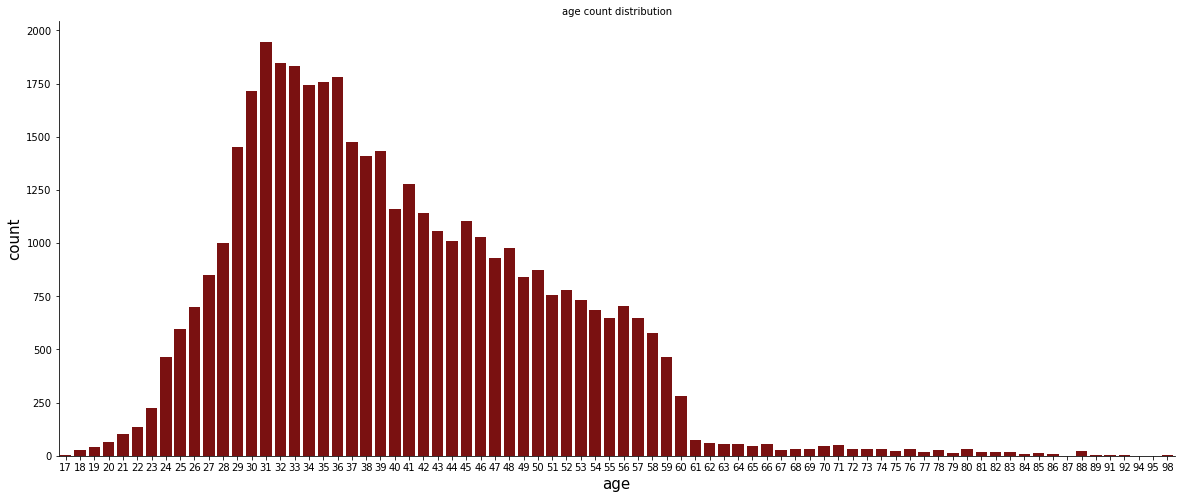

In [167]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x ='age',data= bank_client,color='darkred')
ax.set_xlabel('age',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('age count distribution',fontsize=10)
sns.despine()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


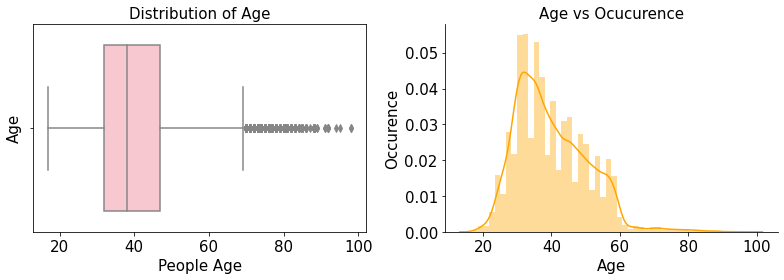

In [174]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (11, 4))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1, color='pink')
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of Age', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2,color='orange')
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age vs Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [175]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client)

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0
41184,2,1,1,5,0,0,0
41185,3,5,1,6,0,2,0
41186,2,9,1,5,0,0,0


In [178]:
bank_related = df_train.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,5,mon,261
1,telephone,5,mon,149
2,telephone,5,mon,226
3,telephone,5,mon,151
4,telephone,5,mon,307


In [179]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 [5 6 7 8 10 11 12 3 4 9]

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


In [57]:

print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [58]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [59]:

df_train[(df_train['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,age_group
6251,39,admin.,married,high.school,no,yes,no,telephone,5,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30
23031,59,management,married,university.degree,no,yes,no,cellular,8,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,50
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,4,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no,50
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,5,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no,30


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

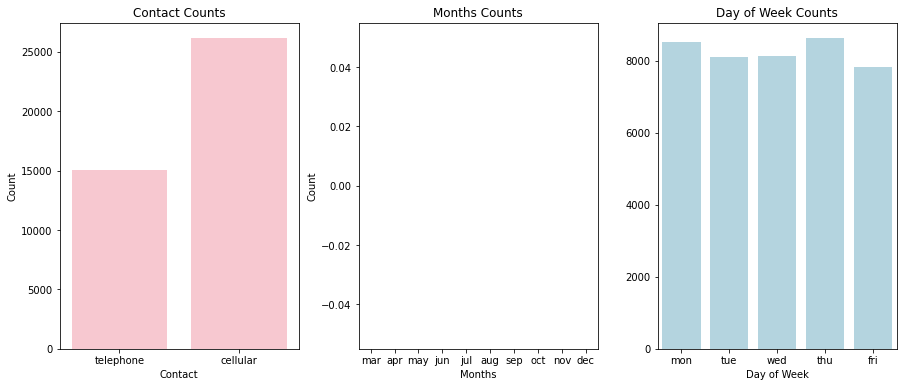

In [184]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1,color='pink')
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], color='red')
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('Count')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3,color='lightblue')
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.25)

In [185]:
bank_related[bank_related['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

In [186]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [187]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,2,1,261
1,1,2,1,149
2,1,2,1,226
3,1,2,1,151
4,1,2,1,307


In [188]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);
bank_related.head()

,contact,month,day_of_week,duration
0,1,2,1,3
1,1,2,1,2
2,1,2,1,3
3,1,2,1,2
4,1,2,1,3


In [189]:
bank_se = df_train.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [190]:
bank_o = df_train.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [191]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [192]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [193]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [194]:
bank_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,2,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,7,1,3,1,0,0,1,2,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,7,1,3,0,2,0,1,2,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,2,0,1,1,0,0,0,1,2,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,7,1,3,0,0,2,1,2,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,8,0,4,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1
41184,2,1,1,5,0,0,0,0,8,0,4,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1
41185,3,5,1,6,0,2,0,0,8,0,3,-1.1,94.767,-50.8,1.028,4963.6,2,999,0,1
41186,2,9,1,5,0,0,0,0,8,0,4,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1


In [195]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [196]:
y = pd.get_dummies(df_train['subscribed'], columns = ['subscribed'], drop_first = True)

In [197]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_new = Scaler_X.fit_transform(bank_final)


In [ ]:
from sklearn.cluster import KMeans

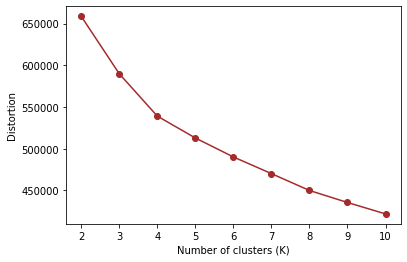

In [199]:
distortions = []

for k in range(2, 11):
    KMeans_model = KMeans(n_clusters=k, random_state=42)
    KMeans_model.fit(X_new)
    distortions.append(KMeans_model.inertia_)

plt.plot(range(2, 11), distortions,  marker='o', color='brown')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.savefig('elbow plot.png')

In [252]:

from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(X_new)
    score = silhouette_score(X_new, model2.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.23119743181905095
Silhouette Score for k =  3 is 0.23166017633369637
Silhouette Score for k =  4 is 0.15425946551166317
Silhouette Score for k =  5 is 0.16309276263452518
Silhouette Score for k =  6 is 0.15491710672848535
Silhouette Score for k =  7 is 0.14953010486036286
Silhouette Score for k =  8 is 0.151149538081854
Silhouette Score for k =  9 is 0.14684059725052903
Silhouette Score for k =  10 is 0.14535111478084262


In [257]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(X_new)
centroids = model.cluster_centers_

print("Centroids",centroids)
print("Model_Interia",model.inertia_)
print("Model_Labels",model.labels_)
clusters = model.fit_predict(X_new)

strlabels = ['']*len(Y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'no'
    elif clusters[i]==1: strlabels[i] = 'yes'

from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(Y, strlabels)*100.0)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cm=confusion_matrix(Y, strlabels, labels=['no','yes'])
print(cm)
print(classification_report(Y, strlabels, labels=['no','yes']))


Centroids [[ 2.80185874e-02 -3.85840915e-03 -6.61920660e-02 -2.16669323e-02
   1.37479448e-01 -4.21482248e-02 -4.72599793e-04  2.92344455e-01
   1.48805769e-01  2.72548127e-02 -4.13515276e-02  6.75179131e-01
   4.85706131e-01  2.36868954e-01  6.98408651e-01  6.46853784e-01
   9.18542813e-02  1.95413900e-01 -3.39202449e-01 -3.61626157e-01]
 [-5.38623249e-02  7.41732209e-03  1.27246192e-01  4.16520408e-02
  -2.64287511e-01  8.10248334e-02  9.08515595e-04 -5.61996642e-01
  -2.86060984e-01 -5.23940610e-02  7.94932801e-02 -1.29794972e+00
  -9.33710935e-01 -4.55351741e-01 -1.34260565e+00 -1.24349769e+00
  -1.76578679e-01 -3.75659444e-01  6.52075433e-01  6.95182282e-01]]
Model_Interia 658836.3378301009
Model_Labels [0 0 0 ... 1 1 1]
Accuracy Score 70.65892978537438
[[25778 10770]
 [ 1315  3325]]
              precision    recall  f1-score   support

          no       0.95      0.71      0.81     36548
         yes       0.24      0.72      0.35      4640

    accuracy                        

In [258]:
hiddenstates=model.predict(X_new)

In [259]:
cm=confusion_matrix(y, hiddenstates)
print(cm)

[[25778 10770]
 [ 1315  3325]]


In [260]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
model = KMeans(n_clusters=2, random_state=42)
kfold = KFold(n_splits=num_folds, random_state=None)
results_lda = cross_val_score(model,X_new, y, cv=kfold) 
accuracy_lda=np.mean(abs(results_lda))
print('Average accuracy: ',accuracy_lda)
print('Standard Deviation: ',results_lda.std())

Average accuracy:  152033.43120278505
Standard Deviation:  47022.35012498507


In [93]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_new)
centroids = model.cluster_centers_

print("Centroids",centroids)
print("Model_Interia",model.inertia_)
print("Model_Labels",model.labels_)
clusters = model.fit_predict(X_new)

strlabels = ['']*len(Y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'no'
    elif clusters[i]==1: strlabels[i] = 'yes'

from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(Y, strlabels)*100.0)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cm=confusion_matrix(Y, strlabels, labels=['no','yes'])
print(cm)
print(classification_report(Y, strlabels, labels=['no','yes']))


Centroids [[ 2.90228967e-02 -2.55777599e-03 -6.57949357e-02 -1.75236762e-02
   1.24716448e-01 -3.98338706e-02 -7.97107337e-04  2.71101058e-01
   1.89458921e-01  2.86531116e-02 -4.44835209e-02  6.59131673e-01
   4.62660068e-01  2.25470169e-01  6.89984045e-01  6.41798200e-01
   8.40066654e-02  1.95413900e-01 -2.98421400e-01 -3.17342188e-01]
 [-7.84179878e-02 -1.29165191e-02  1.26050553e-01  8.92277531e-03
  -2.34619133e-01  8.41003168e-02  3.13019873e-03 -5.47542102e-01
  -4.91223118e-01 -7.20067915e-02  5.27746462e-02 -1.34232073e+00
  -1.01747090e+00 -5.81111453e-01 -1.39565572e+00 -1.23318884e+00
  -1.59522086e-01  1.95413900e-01  2.90560227e-01  2.45899548e-01]
 [ 8.88539530e-02  1.45902723e-01  1.99606060e-01  2.44281991e-01
  -4.11807135e-01  6.04755459e-02 -1.00114417e-02 -6.04083169e-01
   4.19666924e-01  4.57591257e-02  3.86534337e-01 -1.38285114e+00
  -3.87089575e-01  4.72448561e-01 -1.52120549e+00 -1.91894867e+00
  -2.65855816e-01 -5.01073598e+00  3.08531590e+00  3.77005195e+0

In [94]:
#importing the K fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
model = KMeans(n_clusters=3, random_state=42)
kfold = KFold(n_splits=num_folds, random_state=None)
results_lda = cross_val_score(model,X_new, y, cv=kfold) 
accuracy_lda=np.mean(abs(results_lda))
print('Average accuracy: ',accuracy_lda)
print('Standard Deviation: ',results_lda.std())

Average accuracy:  149185.94695889627
Standard Deviation:  47459.279846665595


In [95]:
model = KMeans(n_clusters=4, random_state=8)
model.fit(X_new)
centroids = model.cluster_centers_

print("Centroids",centroids)
print("Model_Interia",model.inertia_)
print("Model_Labels",model.labels_)
clusters = model.fit_predict(X_new)

strlabels = ['']*len(Y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'no'
    elif clusters[i]==1: strlabels[i] = 'yes'

from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(Y, strlabels)*100.0)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cm=confusion_matrix(Y, strlabels, labels=['no','yes'])
print(cm)
print(classification_report(Y, strlabels, labels=['no','yes']))


Centroids [[ 3.88052061e-02 -4.51564289e-02 -9.70523944e-02 -1.78925152e-01
   2.46914039e-01 -1.38813716e-01 -1.04825807e-02  1.31826996e+00
  -5.37324030e-01 -1.30094868e-02 -1.04638634e-02  7.26949858e-01
   9.71428034e-01  4.00594887e-01  7.32011400e-01  5.44517327e-01
   1.23884213e-01  1.95413900e-01 -3.49494284e-01 -3.72802017e-01]
 [ 2.00040548e-02  3.67162340e-02 -3.69769881e-02  1.31281104e-01
   1.20558582e-02  5.14210206e-02  8.13245617e-03 -6.94340781e-01
   8.59519566e-01  6.70641221e-02 -7.58480893e-02  5.96606408e-01
  -6.40073161e-03  6.40131867e-02  6.51236744e-01  7.31486716e-01
   4.72413903e-02  1.95413900e-01 -2.51334536e-01 -2.66210761e-01]
 [ 8.88539530e-02  1.45902723e-01  1.99606060e-01  2.44281991e-01
  -4.11807135e-01  6.04755459e-02 -1.00114417e-02 -6.04083169e-01
   4.19666924e-01  4.57591257e-02  3.86534337e-01 -1.38285114e+00
  -3.87089575e-01  4.72448561e-01 -1.52120549e+00 -1.91894867e+00
  -2.65855816e-01 -5.01073598e+00  3.08531590e+00  3.77005195e+0

In [96]:
#importing the K fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
model = KMeans(n_clusters=4, random_state=8)
kfold = KFold(n_splits=num_folds, random_state=None)
results_lda = cross_val_score(model,X_new, y, cv=kfold) 
accuracy_lda=np.mean(abs(results_lda))
print('Average accuracy: ',accuracy_lda)
print('Standard Deviation: ',results_lda.std())

Average accuracy:  138127.96239875155
Standard Deviation:  52947.30315901826


In [97]:
pip install fuzzy-c-means

     |████████████████████████████████| 10.9 MB 31.6 MB/s 


In [98]:
!pip install fuzzy-c-means

In [99]:
from fcmeans import FCM
fcmean=FCM(n_clusters=3)
fcmean.fit(X_new)

In [100]:
from fcmeans import FCM
fcmean=FCM(n_clusters=3,random_state=142)
fcmean.fit(X_new)
cnt=fcmean.centers
print("Centres",cnt)
pred=fcmean.predict(X_new)
print(pred)

strlabels = ['']*len(Y)
for i in range(len(pred)):
    if pred[i]==0: strlabels[i] = 'no'
    elif pred[i]==1: strlabels[i] = 'yes'

from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(Y, strlabels)*100.0)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cm=confusion_matrix(Y, strlabels, labels=['no','yes'])
print(cm)
print(classification_report(Y, strlabels, labels=['no','yes']))

Centres [[ 6.44573897e-08 -1.40093984e-08 -1.03451381e-07 -6.10778112e-08
   1.65410781e-07 -8.82324628e-08 -4.34297791e-08  4.87732616e-07
   4.70551503e-08  3.67956113e-08 -4.33868970e-08  7.75915829e-07
   6.68079057e-07  3.59406012e-07  7.78868735e-07  6.72287217e-07
   5.93092524e-08  1.20896753e-07 -3.02418894e-07 -3.22521011e-07]
 [-1.28860790e-07  2.80069757e-08  2.06816031e-07  1.22104340e-07
  -3.30683002e-07  1.76390939e-07  8.68229614e-08 -9.75056230e-07
  -9.40713527e-08 -7.35604010e-08  8.67374168e-08 -1.55118143e-06
  -1.33559823e-06 -7.18510965e-07 -1.55708480e-06 -1.34401108e-06
  -1.18568929e-07 -2.41692015e-07  6.04584225e-07  6.44771603e-07]
 [ 6.44032921e-08 -1.39976405e-08 -1.03364557e-07 -6.10265498e-08
   1.65271956e-07 -8.81584113e-08 -4.33933294e-08  4.87323273e-07
   4.70156590e-08  3.67647297e-08 -4.33504834e-08  7.75264622e-07
   6.67518354e-07  3.59104371e-07  7.78215049e-07  6.71722983e-07
   5.92594757e-08  1.20795287e-07 -3.02165081e-07 -3.22250327e-07]

In [107]:
from fcmeans import FCM
fcmean=FCM(n_clusters=2,random_state=10)
fcmean.fit(X_new)
cnt=fcmean.centers
print("Centres",cnt)
pred=fcmean.predict(X_new)
print(pred)

strlabels = ['']*len(Y)
for i in range(len(pred)):
    if pred[i]==0: strlabels[i] = 'no'
    elif pred[i]==1: strlabels[i] = 'yes'

from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(Y, strlabels)*100.0)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cm=confusion_matrix(Y, strlabels, labels=['no','yes'])
print(cm)
print(classification_report(Y, strlabels, labels=['no','yes']))

Centres [[ 7.29451554e-08 -1.58542238e-08 -1.17073908e-07 -6.91206838e-08
   1.87192160e-07 -9.98509965e-08 -4.91486793e-08  5.51957653e-07
   5.32509579e-08  4.16408371e-08 -4.91000729e-08  8.78088490e-07
   7.56051961e-07  4.06732600e-07  8.81430201e-07  7.60813992e-07
   6.71190943e-08  1.36816464e-07 -3.42241449e-07 -3.64990616e-07]
 [-7.29452016e-08  1.58541967e-08  1.17073948e-07  6.91206749e-08
  -1.87192273e-07  9.98510241e-08  4.91486165e-08 -5.51957798e-07
  -5.32511898e-08 -4.16408628e-08  4.91000885e-08 -8.78088906e-07
  -7.56052334e-07 -4.06732849e-07 -8.81430633e-07 -7.60814374e-07
  -6.71191802e-08 -1.36816453e-07  3.42241556e-07  3.64990730e-07]]
[0 0 0 ... 1 1 1]
Accuracy Score 65.71817034087599
[[23619 12929]
 [ 1191  3449]]
              precision    recall  f1-score   support

          no       0.95      0.65      0.77     36548
         yes       0.21      0.74      0.33      4640

    accuracy                           0.66     41188
   macro avg       0.58      

In [108]:
cnt=fcmean.centers
cnt

array([[ 7.29451554e-08, -1.58542238e-08, -1.17073908e-07,
        -6.91206838e-08,  1.87192160e-07, -9.98509965e-08,
        -4.91486793e-08,  5.51957653e-07,  5.32509579e-08,
         4.16408371e-08, -4.91000729e-08,  8.78088490e-07,
         7.56051961e-07,  4.06732600e-07,  8.81430201e-07,
         7.60813992e-07,  6.71190943e-08,  1.36816464e-07,
        -3.42241449e-07, -3.64990616e-07],
       [-7.29452016e-08,  1.58541967e-08,  1.17073948e-07,
         6.91206749e-08, -1.87192273e-07,  9.98510241e-08,
         4.91486165e-08, -5.51957798e-07, -5.32511898e-08,
        -4.16408628e-08,  4.91000885e-08, -8.78088906e-07,
        -7.56052334e-07, -4.06732849e-07, -8.81430633e-07,
        -7.60814374e-07, -6.71191802e-08, -1.36816453e-07,
         3.42241556e-07,  3.64990730e-07]])

In [109]:
pred=fcmean.predict(X_new)
pred

array([0, 0, 0, ..., 1, 1, 1])

In [110]:
y['Fuzzy_cluster'] = pred
y

,yes,Fuzzy_cluster
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
41183,1,1
41184,0,1
41185,0,1
41186,1,1


In [267]:
strlabels = ['']*len(Y)
for i in range(len(pred)):
    if pred[i]==0: strlabels[i] = 'no'
    elif pred[i]==1: strlabels[i] = 'yes'

from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(Y, strlabels)*100.0)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cm=confusion_matrix(Y, strlabels, labels=['no','yes'])
print(cm)
print(classification_report(Y, strlabels, labels=['no','yes']))

NameError: name 'pred' is not defined

In [266]:
data=X_new

In [263]:
fcm = FCM(n_clusters=2)
fcm.fit(data)
yhat = fcm.predict(data)
from numpy import unique
clusters = unique(yhat)

In [265]:
from mpl_toolkits.mplot3d import Axes3D

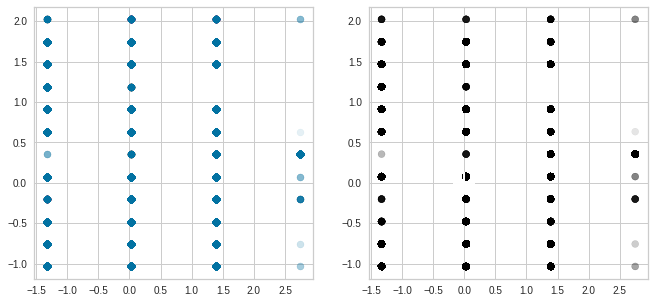

In [270]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(data)
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(data[:,0], data[:,1], alpha=.1)
axes[1].scatter(data[:,0], data[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()